In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

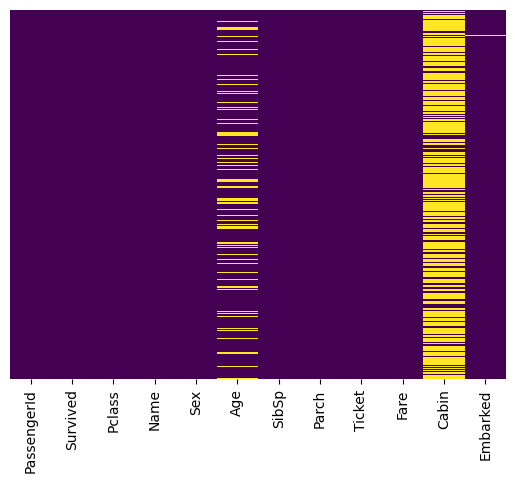

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') #Age and Cabin have the most missing data

<Axes: xlabel='Survived', ylabel='count'>

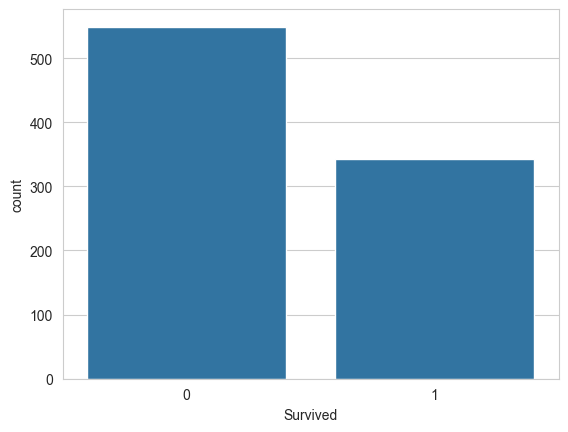

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train) #survivors are half than deceased 

<Axes: xlabel='Survived', ylabel='count'>

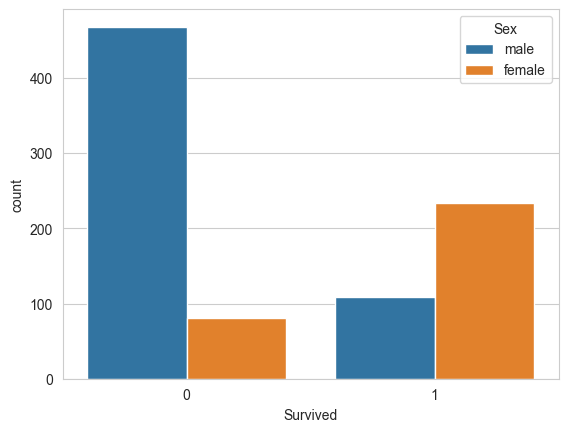

In [6]:
sns.countplot(x='Survived', data=train, hue='Sex') #wmore female survived than male

<Axes: xlabel='Survived', ylabel='count'>

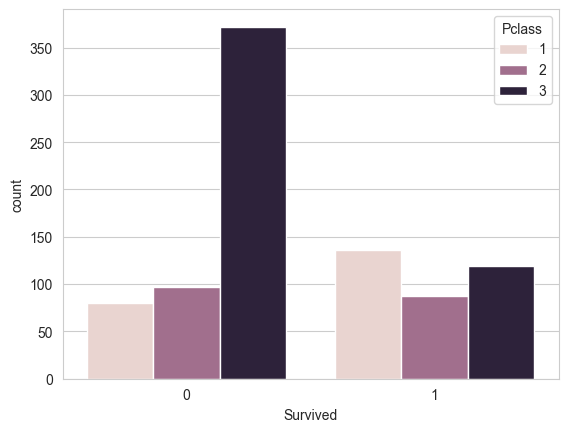

In [7]:
sns.countplot(x='Survived', data=train, hue='Pclass') # 1st class and 2nd are the people who mostly survived

C:\Users\yoush\AppData\Local\Temp\ipykernel_3348\1864128553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], kde=False,bins=30) # most ppl on titanic are young of age (20 - 30)


<Axes: xlabel='Age'>

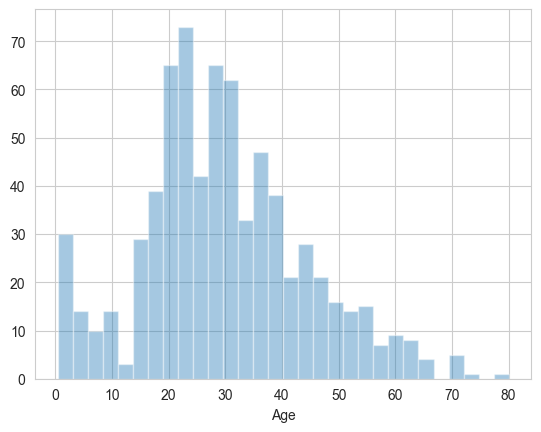

In [8]:
sns.distplot(train['Age'], kde=False,bins=30) # most ppl on titanic are young of age (20 - 30)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

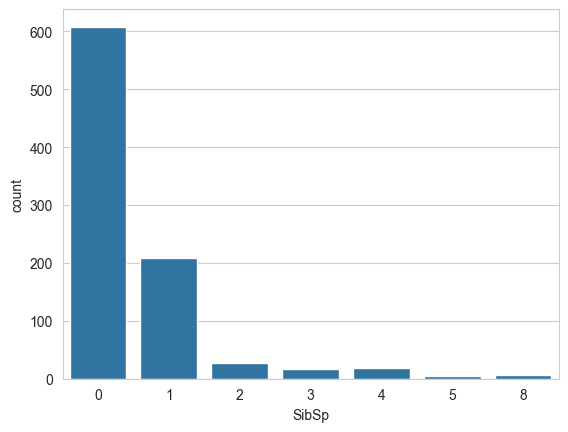

In [10]:
sns.countplot(x='SibSp', data=train) # most people on titanic dont have sibling and spouses 

<Axes: >

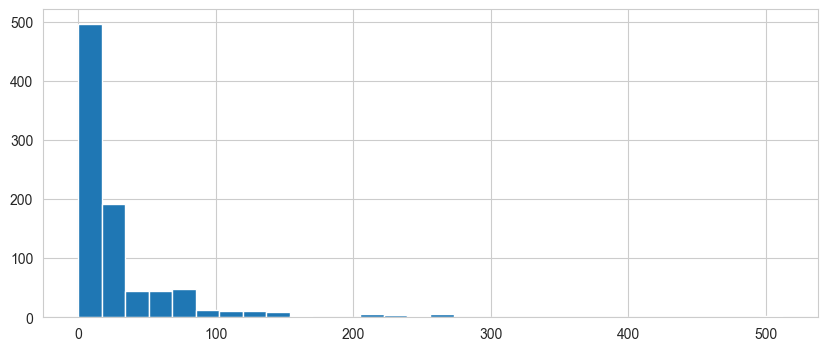

In [11]:
train['Fare'].hist(bins=30, figsize=(10,4))

In [37]:
# ------------------ Filling the null Values, Imputation

<Axes: xlabel='Pclass', ylabel='Age'>

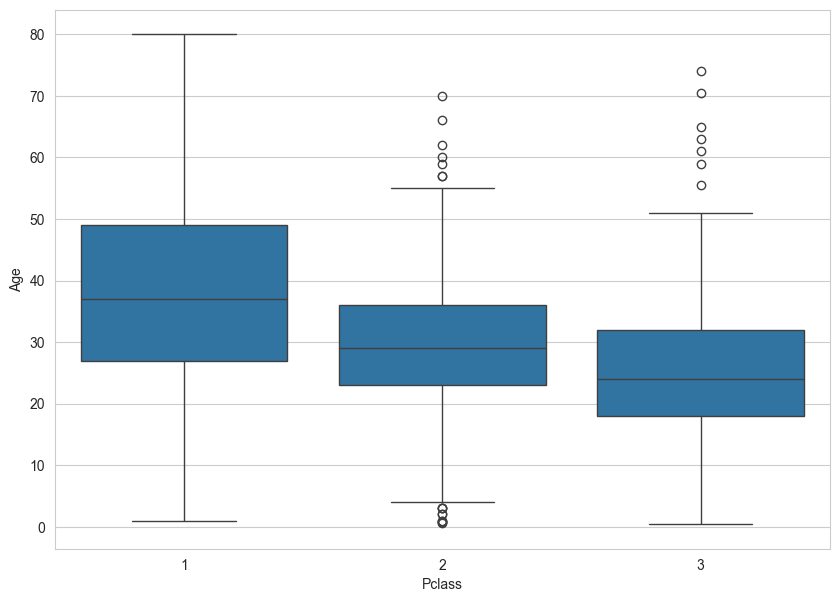

In [43]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [46]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):

        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
        

In [49]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

C:\Users\yoush\AppData\Local\Temp\ipykernel_3348\2591028005.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\yoush\AppData\Local\Temp\ipykernel_3348\2591028005.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

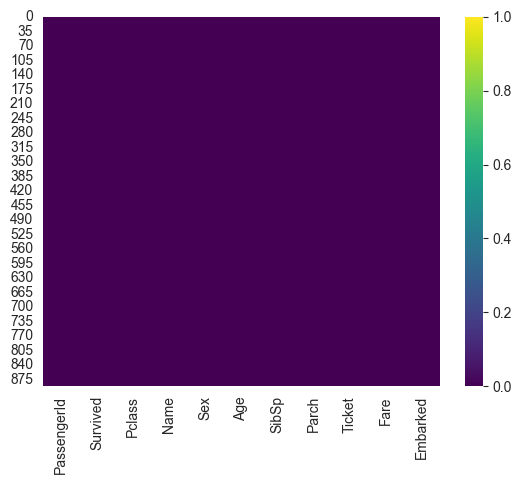

In [58]:
sns.heatmap(train.isnull(), cmap='viridis') #no missing information in age column 

In [56]:
train.drop('Cabin', axis=1, inplace=True) #Cabin have so much missing info so dropping it is better 

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
train.dropna(inplace=True) #Dropping any other missing value 

In [61]:
# ---------------- We cannot give string values to ML algorithm so have to convert them into dummy data

In [75]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.rename(columns={sex.columns[0]: 'male'}, inplace=True)

In [76]:
sex.head() # Male = True otherwise False

,male
0,True
1,False
2,False
3,False
4,True


In [72]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [73]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [77]:
train = pd.concat([train,sex,embark], axis=1)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,S,True,False,True


In [79]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True) #Dropping unnecessary columns 

In [80]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [81]:
train.drop('PassengerId', axis=1, inplace=True) 

In [82]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [84]:
# pd.get_dummies(train['Pclass']) Check the difference in results, if Used get dummies on Pclass and when we dont

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
886,False,True,False
887,True,False,False
888,False,False,True
889,True,False,False
